In [1]:
#CARREGANDO DEPENDÊNCIAS#
 
#Instalando o Pytesseract e o tesseract-OCR
! sudo apt install tesseract-ocr 
! pip install pytesseract
! apt-get install tesseract-ocr-por
! tesseract --list-langs
 
#Importando bibliotecas
import numpy as np
import pandas as pd
import cv2
from google.colab.patches import cv2_imshow # for image display
from skimage import io
import matplotlib.pylab as plt
import scipy
import pytesseract
import shutil
import os
import random
try:
 from PIL import Image
except ImportError:
 import Image

##Desenvolva um código que lhe permita abrir uma imagem RGB ou BGR de sua 
##preferência, utilizando a interface python do OpenCV. Logo depois, converta a imagem para escala de cinza
#e exiba as duas imagens lado a lado na tela. Documente as funções utilizadas no código.

Reading package lists... Done
Building dependency tree       
Reading state information... Done
The following additional packages will be installed:
  tesseract-ocr-eng tesseract-ocr-osd
The following NEW packages will be installed:
  tesseract-ocr tesseract-ocr-eng tesseract-ocr-osd
0 upgraded, 3 newly installed, 0 to remove and 37 not upgraded.
Need to get 4,795 kB of archives.
After this operation, 15.8 MB of additional disk space will be used.
Get:1 http://archive.ubuntu.com/ubuntu bionic/universe amd64 tesseract-ocr-eng all 4.00~git24-0e00fe6-1.2 [1,588 kB]
Get:2 http://archive.ubuntu.com/ubuntu bionic/universe amd64 tesseract-ocr-osd all 4.00~git24-0e00fe6-1.2 [2,989 kB]
Get:3 http://archive.ubuntu.com/ubuntu bionic/universe amd64 tesseract-ocr amd64 4.00~git2288-10f4998a-2 [218 kB]
Fetched 4,795 kB in 1s (4,394 kB/s)
debconf: unable to initialize frontend: Dialog
debconf: (No usable dialog-like program is installed, so the dialog based frontend cannot be used. at /usr/share/perl

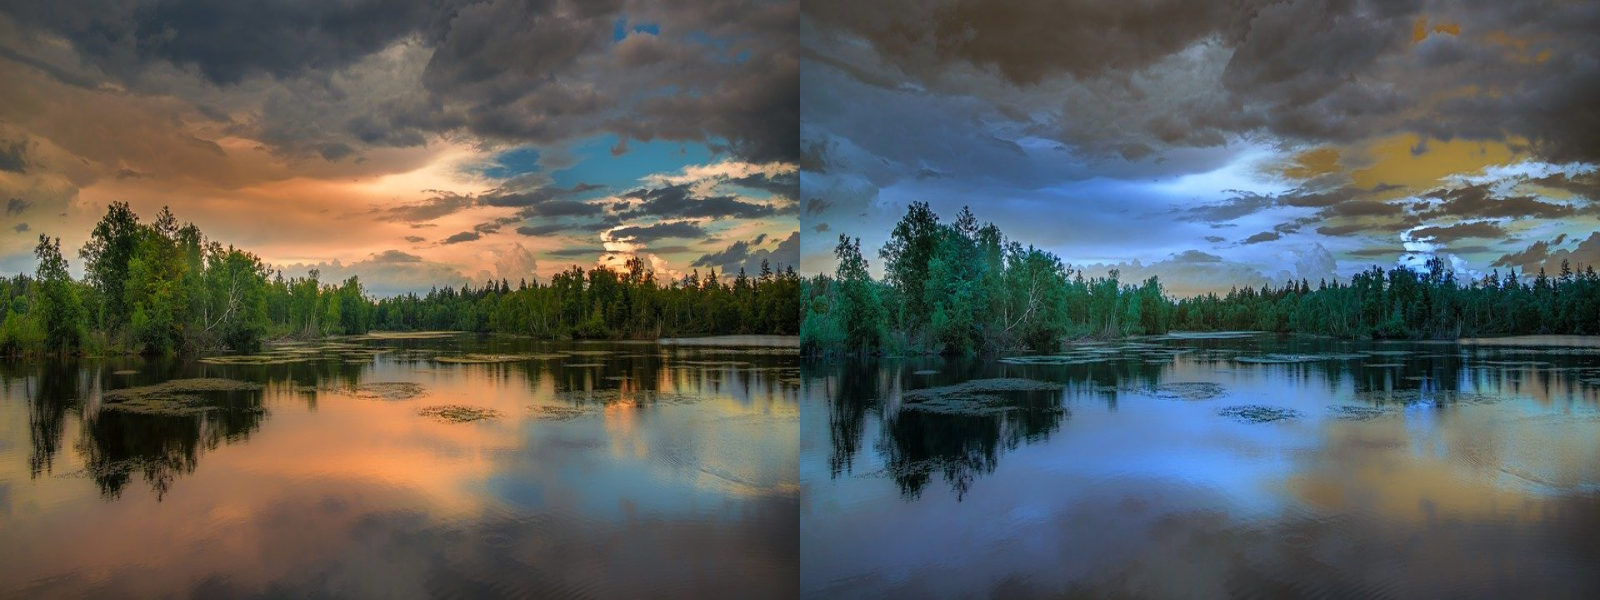

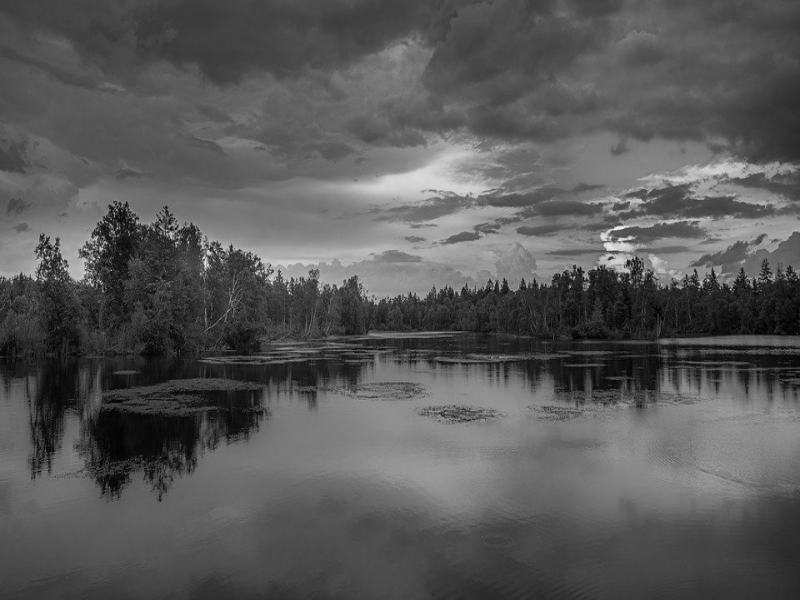

In [2]:
imagem = cv2.imread('/content/Paisagem.jpg')

#Redimensionamento de imagem para 800x600
imagem = cv2.resize(imagem,(800,600))

#Ler a imagem
imagem2 = cv2.cvtColor(imagem, cv2.COLOR_BGR2RGB)

#Iserindo as imagens lado a lado
imagem_final = cv2.hconcat ((imagem, imagem2))

#Exibir a imagem
cv2_imshow(imagem_final)

#Alterando a imagem para a escala de cinza
image_PB = cv2.cvtColor(imagem2, cv2.COLOR_BGR2GRAY)

#Exibir a imagem escala de cinza
cv2_imshow(image_PB)

In [3]:
#Importando o classificador de face
detector_facial = cv2.CascadeClassifier('/content/haarcascade_frontalface_default.xml')

51 51
55 55
72 72
65 65
62 62
62 62
55 55
63 63
64 64
69 69
73 73
67 67
64 64
64 64
63 63
72 72


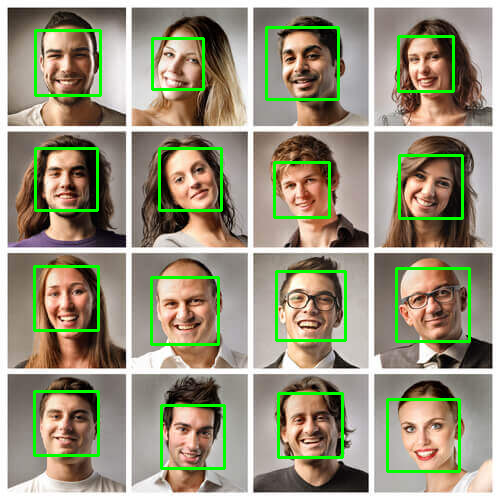

In [9]:
#Importar a imagem para ser utilizada para detecção de face
fotoface = cv2.imread('/content/Rostos.jpeg')
#Converter a imagem para escala de cinza
image_gray = cv2.cvtColor(fotoface, cv2.COLOR_BGR2GRAY)
#Definir o detector de face e seus parametros
detector = detector_facial.detectMultiScale(image_gray, scaleFactor=1.1, minNeighbors=3,
                                             minSize=(32,32), maxSize=(100,100))
#Criar um for através do detector para desenhar as bbox e printar seu tamanho
for (x, y, w, h) in detector:
  print(w, h)
  cv2.rectangle(fotoface, (x, y), (x + w, y + h), (0,255,0), 2)

#Mostrando a imagem final com as bbox
cv2_imshow(fotoface)

In [10]:
#Leitura da imagem e convertendo para texto utilizando o OCR

image_texto = "/content/doc.png"
texto = pytesseract.image_to_string(image_texto, lang='por')
print(texto)

7. O documento digital e o documento digitalizado são a mesma coisa?

Resposta: O documento digitalizado é um tipo de documento digital. Os documentos digitais têm duas origens
distintas: os que já nascem digitais e os que são gerados a partir de digitalização. Ambos são codificados em
dígitos binários, acessíveis e interpretáveis por meio de um sistema computacional.

O documento digitalizado é a representação digital de um documento produzido em outro formato e que, por
meio da digitalização, foi convertido para o formato digital. Geralmente, esse Fepresentante digital visa a facilitar a
disseminação e o acesso, além de evitar o manuseio do original, contribuindo para a sua preservação.Todo
documento digitalizado é um documento digital, mas nem todo documento digital é um documento digitalizado.

Exemplo:

1) Documento nato digital (born digital): Textos em Microsoft Word, fotografias tiradas em câmeras digitais, plantas
de arquitetura e urbanismo criadas em AutoCAD, mensagens de cor